In [1]:
import pandas as pd
import numpy as np
import tensorflow
import matplotlib.pyplot as plt

In [2]:
from keras import optimizers, losses, activations, models
from keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler, ReduceLROnPlateau
from keras.layers import Dense, Input, Dropout, Convolution1D, MaxPool1D, GlobalMaxPool1D, GlobalAveragePooling1D, \
    concatenate
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split

In [3]:
normal_data = pd.read_csv("ptbdb_normal.csv", header=None)
abnormal_data = pd.read_csv("ptbdb_abnormal.csv", header=None)
dataset = pd.concat([normal_data, abnormal_data])


In [4]:
normal_data

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4041,1.000000,0.929586,0.503550,0.293491,0.169822,0.159763,0.130769,0.125444,0.137278,0.111243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4042,1.000000,0.637579,0.154837,0.061983,0.088965,0.083374,0.065143,0.057365,0.060039,0.060039,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4043,1.000000,0.872574,0.465071,0.232212,0.126132,0.155886,0.174644,0.190168,0.203752,0.168823,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4044,0.915983,0.529373,0.288406,0.144536,0.171802,0.180669,0.177566,0.176458,0.178896,0.180448,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
abnormal_data

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.932233,0.869679,0.886186,0.929626,0.908775,0.933970,0.801043,0.749783,0.687229,0.635100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.000000,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.977819,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.935618,0.801661,0.805815,1.000000,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10501,0.981409,1.000000,0.559171,0.287093,0.196639,0.204862,0.215946,0.243833,0.242760,0.250268,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10502,0.906250,0.922379,0.878024,0.810484,0.712702,0.667339,0.608871,0.527218,0.480847,0.442540,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10503,1.000000,0.867971,0.674122,0.470332,0.296987,0.169307,0.077664,0.081392,0.074868,0.089779,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10504,1.000000,0.984672,0.658888,0.556394,0.446809,0.395790,0.315260,0.276367,0.261039,0.258522,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [6]:
dataset.shape

(14552, 188)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14552 entries, 0 to 10505
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 21.0 MB


In [10]:
dataset.describe()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,...,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.0,14552.000000
mean,0.976637,0.721663,0.403099,0.242893,0.207218,0.216453,0.221752,0.224486,0.227349,0.229704,...,0.001190,0.001133,0.000900,0.000739,0.000661,0.000475,0.000177,0.000185,0.0,0.721963
std,0.034532,0.195690,0.249794,0.249519,0.218097,0.192412,0.180740,0.176943,0.176674,0.176579,...,0.021361,0.021012,0.017316,0.014640,0.014033,0.012289,0.006545,0.006835,0.0,0.448047
min,0.624227,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.959377,0.584589,0.212300,0.052269,0.061875,0.090487,0.096503,0.097095,0.097231,0.097144,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,1.000000,0.740148,0.371911,0.168148,0.136082,0.159451,0.167479,0.171541,0.177380,0.180337,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
75%,1.000000,0.881483,0.557785,0.336232,0.264104,0.264633,0.286484,0.302255,0.311664,0.325292,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.985523,0.993213,0.997738,...,0.791899,0.773743,0.789804,0.628177,0.602033,0.644880,0.371502,0.376668,0.0,1.000000


In [11]:
dataset_train, dataset_test = train_test_split(dataset, test_size=0.2, random_state=1337, stratify=dataset[187])


In [12]:
Y = np.array(dataset_train[187].values).astype(np.int8)
X = np.array(dataset_train[list(range(187))].values)[..., np.newaxis]

In [13]:
Y_test = np.array(dataset_test[187].values).astype(np.int8)
X_test = np.array(dataset_test[list(range(187))].values)[..., np.newaxis]

In [14]:
from tensorflow.keras import layers, models, optimizers, losses
from tensorflow.keras.layers import Input, Convolution1D, MaxPool1D, Dropout, GlobalMaxPool1D, Dense, BatchNormalization, LeakyReLU
from tensorflow.keras.callbacks import ReduceLROnPlateau

def get_model():
    nclass = 1
    
    inp = Input(shape=(187, 1))
    
    # First Convolution Block
    img_1 = Convolution1D(32, kernel_size=7, padding="valid")(inp)
    img_1 = BatchNormalization()(img_1)
    img_1 = LeakyReLU()(img_1)
    img_1 = Convolution1D(32, kernel_size=7, padding="valid")(img_1)
    img_1 = BatchNormalization()(img_1)
    img_1 = LeakyReLU()(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Dropout(rate=0.2)(img_1)

    # Second Convolution Block
    img_1 = Convolution1D(64, kernel_size=5, padding="valid")(img_1)
    img_1 = BatchNormalization()(img_1)
    img_1 = LeakyReLU()(img_1)
    img_1 = Convolution1D(64, kernel_size=5, padding="valid")(img_1)
    img_1 = BatchNormalization()(img_1)
    img_1 = LeakyReLU()(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Dropout(rate=0.3)(img_1)

    # Third Convolution Block
    img_1 = Convolution1D(128, kernel_size=3, padding="valid")(img_1)
    img_1 = BatchNormalization()(img_1)
    img_1 = LeakyReLU()(img_1)
    img_1 = Convolution1D(128, kernel_size=3, padding="valid")(img_1)
    img_1 = BatchNormalization()(img_1)
    img_1 = LeakyReLU()(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Dropout(rate=0.3)(img_1)

    # Fourth Convolution Block
    img_1 = Convolution1D(256, kernel_size=3, padding="valid")(img_1)
    img_1 = BatchNormalization()(img_1)
    img_1 = LeakyReLU()(img_1)
    img_1 = Convolution1D(256, kernel_size=3, padding="valid")(img_1)
    img_1 = BatchNormalization()(img_1)
    img_1 = LeakyReLU()(img_1)
    img_1 = GlobalMaxPool1D()(img_1)
    img_1 = Dropout(rate=0.4)(img_1)

    # Fully Connected Layers
    dense_1 = Dense(128, activation='relu', name="dense_1")(img_1)
    dense_1 = Dropout(0.3)(dense_1)
    dense_1 = Dense(64, activation='relu', name="dense_2")(dense_1)
    dense_1 = Dropout(0.2)(dense_1)
    dense_1 = Dense(nclass, activation='sigmoid', name="dense_3_ptbdb")(dense_1)

    # Compile Model
    model = models.Model(inputs=inp, outputs=dense_1)
    
    # Optimizer with Learning Rate Scheduler
    opt = optimizers.Adam(learning_rate=0.001)
    lr_schedule = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)

    model.compile(optimizer=opt, loss=losses.binary_crossentropy, metrics=['accuracy'])
    
    model.summary()
    
    return model, lr_schedule


In [23]:
def get_model():
    nclass = 1
    inp = Input(shape=(187, 1))
    img_1 = Convolution1D(16, kernel_size=5, activation=activations.relu, padding="valid")(inp)
    img_1 = Convolution1D(16, kernel_size=5, activation=activations.relu, padding="valid")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Dropout(rate=0.1)(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Dropout(rate=0.1)(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Dropout(rate=0.1)(img_1)
    img_1 = Convolution1D(256, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(256, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = GlobalMaxPool1D()(img_1)
    img_1 = Dropout(rate=0.2)(img_1)

    dense_1 = Dense(64, activation=activations.relu, name="dense_1")(img_1)
    dense_1 = Dense(64, activation=activations.relu, name="dense_2")(dense_1)
    dense_1 = Dense(nclass, activation=activations.sigmoid, name="dense_3_ptbdb")(dense_1)

    model = models.Model(inputs=inp, outputs=dense_1)
    opt = tensorflow.keras.optimizers.Adam(0.001)

    model.compile(optimizer=opt, loss=losses.binary_crossentropy, metrics=['acc'])
    model.summary()
    return model

In [24]:
model = get_model()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 187, 1)]          0         
                                                                 
 conv1d_8 (Conv1D)           (None, 183, 16)           96        
                                                                 
 conv1d_9 (Conv1D)           (None, 179, 16)           1296      
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 89, 16)            0         
 g1D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 89, 16)            0         
                                                                 
 conv1d_10 (Conv1D)          (None, 87, 32)            1568      
                                                           

In [25]:
path = "ptbdb.h5"

In [26]:
model_checkpoint = ModelCheckpoint(path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [27]:
early_stopping = EarlyStopping(monitor="val_acc", mode="max", patience=5, verbose=1)

In [28]:
reduced = ReduceLROnPlateau(monitor="val_acc", mode="max", patience=3, verbose=2)

In [29]:
callbacks_list = [model_checkpoint, early_stopping, reduced]  # early_stopping


In [30]:
history = model.fit(X, Y, epochs=10, verbose=2, callbacks=callbacks_list, validation_split=0.1)
model.load_weights(path)

Epoch 1/10



Epoch 1: val_acc improved from -inf to 0.77339, saving model to ptbdb.h5
328/328 - 11s - loss: 0.4939 - acc: 0.7507 - val_loss: 0.4455 - val_acc: 0.7734 - lr: 0.0010 - 11s/epoch - 33ms/step
Epoch 2/10


C:\Users\ktmay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_acc improved from 0.77339 to 0.84549, saving model to ptbdb.h5
328/328 - 10s - loss: 0.3424 - acc: 0.8621 - val_loss: 0.4023 - val_acc: 0.8455 - lr: 0.0010 - 10s/epoch - 32ms/step
Epoch 3/10

Epoch 3: val_acc improved from 0.84549 to 0.92361, saving model to ptbdb.h5
328/328 - 11s - loss: 0.2577 - acc: 0.8997 - val_loss: 0.2000 - val_acc: 0.9236 - lr: 0.0010 - 11s/epoch - 32ms/step
Epoch 4/10

Epoch 4: val_acc did not improve from 0.92361
328/328 - 13s - loss: 0.2139 - acc: 0.9201 - val_loss: 0.2361 - val_acc: 0.9133 - lr: 0.0010 - 13s/epoch - 40ms/step
Epoch 5/10

Epoch 5: val_acc improved from 0.92361 to 0.94506, saving model to ptbdb.h5
328/328 - 13s - loss: 0.1947 - acc: 0.9281 - val_loss: 0.1532 - val_acc: 0.9451 - lr: 0.0010 - 13s/epoch - 40ms/step
Epoch 6/10

Epoch 6: val_acc improved from 0.94506 to 0.94678, saving model to ptbdb.h5
328/328 - 12s - loss: 0.1713 - acc: 0.9377 - val_loss: 0.1516 - val_acc: 0.9468 - lr: 0.0010 - 12s/epoch - 38ms/step
Epoch 7/10

Epoc

In [31]:
predicted = model.predict(X_test)
predicted = (predicted>0.5).astype(np.int8)


91/91 [==============================] - 2s 14ms/step


In [32]:
resultats = open("résultats_obtenus.txt", "w")


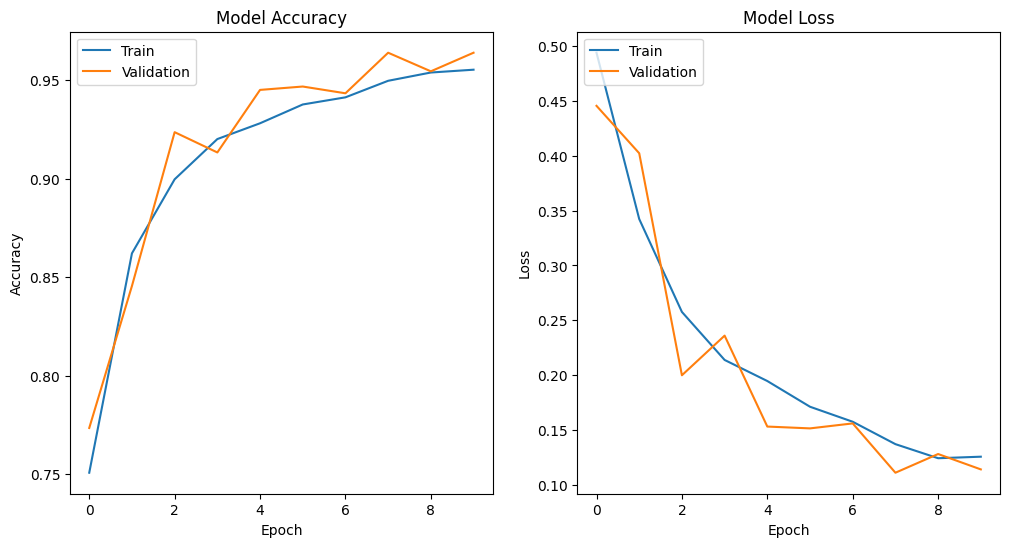

In [33]:
# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Show plot
plt.show()


In [34]:
f1 = f1_score(Y_test, predicted)
print("Test f1 score : %s "% f1)
acc = accuracy_score(Y_test, predicted)
print("Test accuracy score : %s "% acc)

from sklearn.metrics import precision_score, recall_score

# Calculate precision
precision = precision_score(Y_test, predicted)

# Calculate recall
recall = recall_score(Y_test, predicted)

print("Precision: %.4f" % precision)
print("Recall: %.4f" % recall)


Test f1 score : 0.9770061004223369 
Test accuracy score : 0.9663345929233941 
Precision: 0.9639
Recall: 0.9905


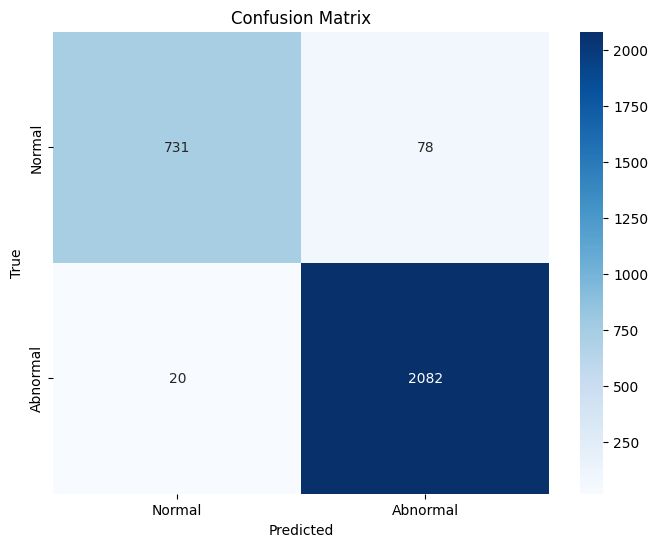

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.90      0.94       809
           1       0.96      0.99      0.98      2102

    accuracy                           0.97      2911
   macro avg       0.97      0.95      0.96      2911
weighted avg       0.97      0.97      0.97      2911



In [35]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Calculate confusion matrix
cm = confusion_matrix(Y_test, predicted)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Normal', 'Abnormal'], yticklabels=['Normal', 'Abnormal'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Calculate classification report
class_report = classification_report(Y_test, predicted)
print("Classification Report:\n", class_report)


In [37]:
model.save('my_model.h5')  # or model.save('my_model.tf') for TensorFlow format

C:\Users\ktmay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [42]:
!pip install pickle

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\ktmay\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [40]:
# Step 3: Save the training history using pickle
with open('train_history.pkl', 'wb') as file:
    pickle.dump(history.history, file)

NameError: name 'pickle' is not defined

In [ ]:
print("Model and history saved successfully.")